In [48]:
from sympy.solvers import solve
from sympy import Symbol
from sympy.matrices import Matrix
from sympy.functions import exp
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [66]:
x = np.array([2,2,2,2]).reshape(-1,1)
y = np.array([0,0,0,0]).reshape(-1,1)
cdist(x, y, 'euclidean')
# def f(c, ntk_val):
#     return (ntk_val - Matern(length_scale=c, nu=1.5)(x,y))[0,0]

lengthscale = []
for depth in tqdm(range(1, 100)):
    ntk_val = NTK(depth=depth, c=2, bias=0, bias_bounds='fixed')(x,y)
    c = -np.log(ntk_val)/cdist(x,y)
    lengthscale.append(c[0,0])

# ntk_mat = Matrix(ntk_val)
# np.linalg.norm(x - y)
# lpk_mat = Matrix(np.linalg.norm(x - y))
# c = Symbol('c')
# solve(ntk_mat - exp(c*lpk_mat))

100%|██████████| 99/99 [00:00<00:00, 274.85it/s]


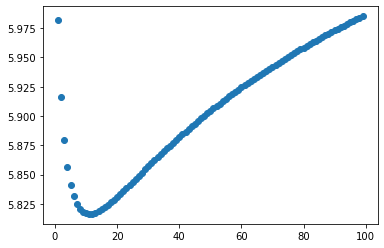

In [67]:
plt.scatter(range(1,100), lengthscale)